#  HW4
# "Pre-lecture" HW

## 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

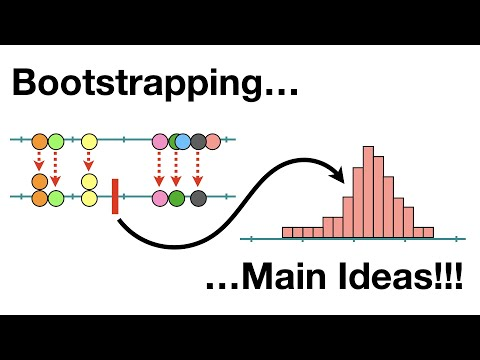

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

*link of chat history:* https://chatgpt.com/share/66fe2664-d2f8-8005-8c31-b36d385fa895

As what we know, the standard deviation measures the variability or spread of individual data points in a dataset. It provides a measure of how spread out the numbers in a dataset are.

The standard error of the mean measures how much the sample mean is expected to vary from the true population mean. It reflects the precision of the sample mean as an estimate of the population mean. It essentially captures the uncertainty or precision of the sample mean as an estimate of the population mean.

So in my point of view, the standard deviation captures the how spread out the individual data points in a dataset is. It tells us how much the values deviate from the mean. It captures individual data points. While standard error of the mean captures the precision of the sample mean as an estimate of the population mean. It indicates how much the sample mean is expected to vary from the true population mean. It captures sample mean.

## 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this. How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.

First I need to resample with replacement from the original dataset multiple times, and for each resample, compute the sample mean. After that I need to calculate the mean of the bootstrapped sample means and then calculate the standard error of the mean.

For a 95% confidence interval, we assume a normal distribution and use the multiplier 1.96, which corresponds to the critical value for a 95% confidence level.

Finally, using the 1.96 multiplier for the 95% confidence interval.
We can get the confidence interval = sample mean - (1.96 x SEM) to sample mean + (1.96 x SEM)

*1.96 is the z-score for a 95% confidence level in a normal distribution*


## 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.

First, resample the original data with replacement a large number of times, and then **sort** the bootstrapped sample means in ascending order. This sorted list represents the empirical distribution of the sample means.

Second, to create a 95% confidence interval, find the 2.5th and 97.5th percentiles from the sorted bootstrapped sample means. These percentiles correspond to the lower and upper bounds of the interval, respectively.

Finally, I can get the 95% bootstrapped confidence interval since the values at the 2.5th and 97.5th percentiles represent the lower and upper bounds of the 95% confidence interval

Confidence interval = (values at the 2.5th percentile, values at the 97.5th percentile)

## 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).

In [2]:
import numpy as np

# Sample data
data = np.array([10, 12, 14, 13, 15, 16, 14, 13, 15, 18])  # Replace with your sample data

# Number of bootstrap samples
n_bootstraps = 10000

# Function to calculate the bootstrap confidence interval for the mean
def bootstrap_ci(data, n_bootstraps=10000, alpha=0.05):
    # Calculate the sample mean
    sample_mean = np.mean(data)
    
    # Generate bootstrap samples and calculate their means
    boot_means = np.random.choice(data, size=(n_bootstraps, len(data)), replace=True).mean(axis=1)
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(boot_means, 100 * (alpha / 2))
    upper_bound = np.percentile(boot_means, 100 * (1 - alpha / 2))
    
    return sample_mean, (lower_bound, upper_bound)

# Calculate the 95% bootstrap confidence interval for the population mean
mean_ci = bootstrap_ci(data)
print(f"Bootstrap CI for population mean: {mean_ci}")

# Function to calculate the bootstrap confidence interval for the median
def bootstrap_ci_median(data, n_bootstraps=10000, alpha=0.05):
    # Calculate the sample median
    sample_median = np.median(data)
    
    # Generate bootstrap samples and calculate their medians
    boot_medians = np.array([np.median(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstraps)])
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(boot_medians, 100 * (alpha / 2))
    upper_bound = np.percentile(boot_medians, 100 * (1 - alpha / 2))
    
    return sample_median, (lower_bound, upper_bound)

# Calculate the 95% bootstrap confidence interval for the population median
median_ci = bootstrap_ci_median(data)
print(f"Bootstrap CI for population median: {median_ci}")


Bootstrap CI for population mean: (14.0, (12.7, 15.3))
Bootstrap CI for population median: (14.0, (12.5, 15.5))


**Calculating lower and upper percentiles** is essential in the bootstrap method for constructing confidence intervals. It allows us to effectively communicate the uncertainty around our estimates and to provide a range in which we believe the true parameter resides, based on the evidence from our sample. The lower bound is the smallest value in the confidence interval. It represents the point below which we expect a certain percentage (e.g., 2.5% for a 95% CI) of the bootstrap estimates (means or medians) to fall. The upper bound is the largest value in the confidence interval. It represents the point above which we expect a certain percentage (e.g., 2.5% for a 95% CI) of the bootstrap estimates to fall.

*link of chat history:* https://chatgpt.com/share/66fe2d57-71b0-8005-adf2-80fa47b12730


# "Post-lecture" HW 

## 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.

Confidence intervals aim to infer something about the population parameter based on the observed sample. 

**Population Parameter** is a fixed value that describes a characteristic of an entire population, such as the population mean, population proportion, or population standard deviation. 

**Sample Statistic** is a value calculated from a sample of the population. The sample statistic, such as the sample mean, is used as an estimate of the corresponding population parameter.

When it comes to confidence intervals, the sample statistic varies with different samples due to sampling variability, so we use confidence intervals to express this uncertainty when making inferences about the population parameter.
For example, if we are estimating the population mean, we would compute a confidence interval based on the sample mean

## 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.

### What is the process of bootstrapping?


From the pre-class video, it said that there are four steps in the process of bootstrapping.
1. make a bootstrapped dataset
2. calculate something (for example, the mean)
3. keep track of that calculation
4. repeat step 1 to 3 a bunch of times

### What is the main purpose of bootstrapping?


The main purpose of bootstrapping is to estimate the distribution of a statistic by resampling the original dataset. Compared with repeating the experiments a bunch of times, bootstrappingn is less expensive and time consuming. Also, bootstrapping helps to improve the reliability of statistical estimates and inferences.

### If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

I would randomly resample from my original sample with replacement to create a bootstrap sample of the same size n and repeat this resampling process a large number of times to generate a distribution of bootstrap samples. For each bootstrap sample, I will calculate the mean and add them into the histogram. 

After that I will calculate a confidence interval for the bootstrap means. And check whether my hypothesized mean falls within the confidence interval obtained from the bootstrap distribution. 

If it falls within the interval, it suggests that my hypothesis is plausible given the sample data. If it does not, this indicates that my hypothesis may not be a plausible estimate of the population mean.

## 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is [on average] not doing anything". This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect [on average]". Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.

The null hypothesis in a hypothesis test often represents the idea of "no effect" or "no difference." A confidence interval provides a range of values for the population parameter based on your sample statistic. 
 
Even if the observed sample mean is not zero, a confidence interval that includes zero implies that zero could still be the true population mean. In other words, the data do not provide enough evidence to rule out the possibility that the true effect is zero. 

In order to reject the null hypothesis, the confidence interval must exclude zero. This would indicate that the true population parameter is not zero, and therefore, the drug likely has a significant effect.

Also, "on average" refers to the average or mean effect of the drug in the population being studied. It addresses whether, across the entire population, the drug has a meaningful effect when considering all individuals.

## 8. Complete the following assignment.

### Problem Introduction

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. This analysis aims to determine whether or not this new vaccine is effective.

#### Null Hypothesis

The null hypothesis in this context is that there is no effect of the vaccine on health scores. 

In [15]:
import pandas as pd

# Create a dictionary or DataFrame with the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the dictionary into a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('patient_data.csv', index=False)  # index=False to avoid writing row numbers

print(df)


   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


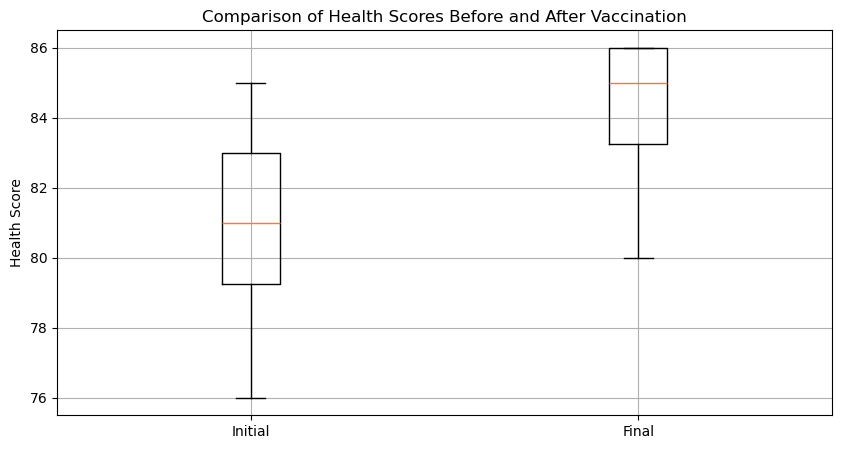

In [16]:
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 5))
plt.boxplot([df['InitialHealthScore'], df['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Comparison of Health Scores Before and After Vaccination')
plt.ylabel('Health Score')
plt.grid()
plt.show()


### Quantitative Analysis

Bootstrapping will be used to quantitatively analyze the difference in health scores.

In [17]:
# Calculate health improvement for each patient
df['HealthImprovement'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, n_iterations=1000, confidence_level=0.95):
    # Generate bootstrap samples and compute the mean for each
    bootstrap_means = []
    for _ in range(n_iterations):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    # Calculate the confidence interval
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    
    return np.mean(bootstrap_means), (lower_bound, upper_bound)

# Run bootstrap on HealthImprovement
mean_improvement, confidence_interval = bootstrap(df['HealthImprovement'].values)

# Output results
print(f"Mean Improvement: {mean_improvement}")
print(f"95% Confidence Interval: {confidence_interval}")


Mean Improvement: 3.2462
95% Confidence Interval: (0.7, 5.7)


#### Methodology Code and Explanations


Bootstrapping is a resampling method that estimates the distribution of a statistic by repeatedly resampling from the original data. 
After generating bootstrap samples we added them into a histogram to show the distribution of the mean health improvement. 
Then we get the mean improvement and 95% confidence intervals to help assess the significance of the results.

#### Supporting Visualizations


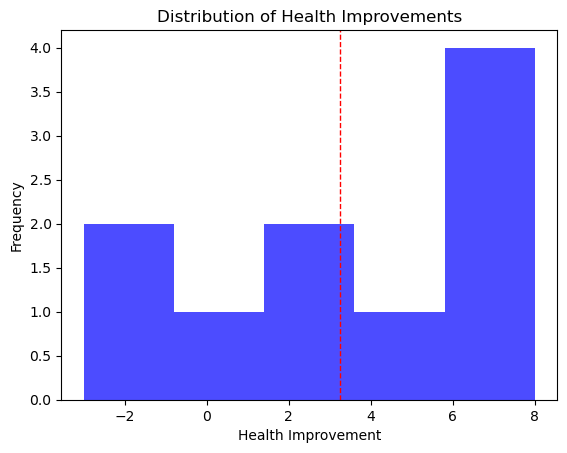

In [18]:
# Plot histogram of health improvements
plt.hist(df['HealthImprovement'], bins=5, alpha=0.7, color='blue')
plt.axvline(mean_improvement, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Health Improvements')
plt.xlabel('Health Improvement')
plt.ylabel('Frequency')
plt.show()

### Findings and Discussion


#### Conclusion regarding a Null Hypothesis of "no effect"


Since this confidence interval does not include zero, we reject the null hypothesis, indicating that the vaccine likely has a positive effect on health scores. The data suggests that the vaccine does have a significant positive impact on improving health scores.

#### Further Considerations


We can use larger sample sizes in the future and exploring other factors influencing health outcomes may provide deeper insights.

## 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes